In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from argparse import Namespace

In [4]:
# Simulate the prediction
args = Namespace()
args.config_file = "configs/SOTR/R_101_DCN_doc.yaml"
args.resume = False
args.eval_only = True
args.num_gpus =1
args.num_machines=1
args.machine_rank = 0
args.dist_url = "tcp://127.0.0.1:8080"
args.opts = ["MODEL.WEIGHTS", "weights/model_final.pth"]

In [5]:
from tools.train_net_custom import setup, Trainer
from detectron2.utils.visualizer import Visualizer
from adet.checkpoint import AdetCheckpointer

In [6]:
cfg = setup(args);

[08/02 00:09:55 detectron2]: Rank of current process: 0. World size: 1
[08/02 00:09:56 detectron2]: Environment info:
----------------------  --------------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.11 (default, Jul 27 2021, 14:32:16) [GCC 7.5.0]
numpy                   1.21.5
detectron2              0.2 @/home/fjbriones/Theoria/detectron2-0.2.1/detectron2
Compiler                GCC 9.4
CUDA compiler           CUDA 10.1
detectron2 arch flags   sm_61
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1 @/home/fjbriones/anaconda3/envs/instaseg/lib/python3.7/site-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   NVIDIA GeForce GTX 1080
CUDA_HOME               /usr
Pillow                  8.4.0
torchvision             0.8.2 @/home/fjbriones/anaconda3/envs/instaseg/lib/python3.7/site-packages/torchvision
torchvision arch flags  sm_35, sm_50, sm_

In [7]:
model = Trainer.build_model(cfg);

[08/02 00:09:58 d2.engine.defaults]: Model:
SOTR(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequent

In [8]:
checkpointer = AdetCheckpointer(model, save_dir=cfg.OUTPUT_DIR)

In [9]:
checkpointer.resume_or_load(cfg.MODEL.WEIGHTS, resume=False);

[08/02 00:09:58 fvcore.common.checkpoint]: Loading checkpoint from weights/model_final.pth


In [10]:
model_loaded = checkpointer.model

In [11]:
model_loaded.eval()

SOTR(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock(
         

In [12]:
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
from glob import glob
import os

In [13]:
sample_img = Image.open("examples/PMC3576793_00004.jpg")

In [14]:
sample_img.size

(601, 792)

In [15]:
sample_img = sample_img.resize((640, 768))

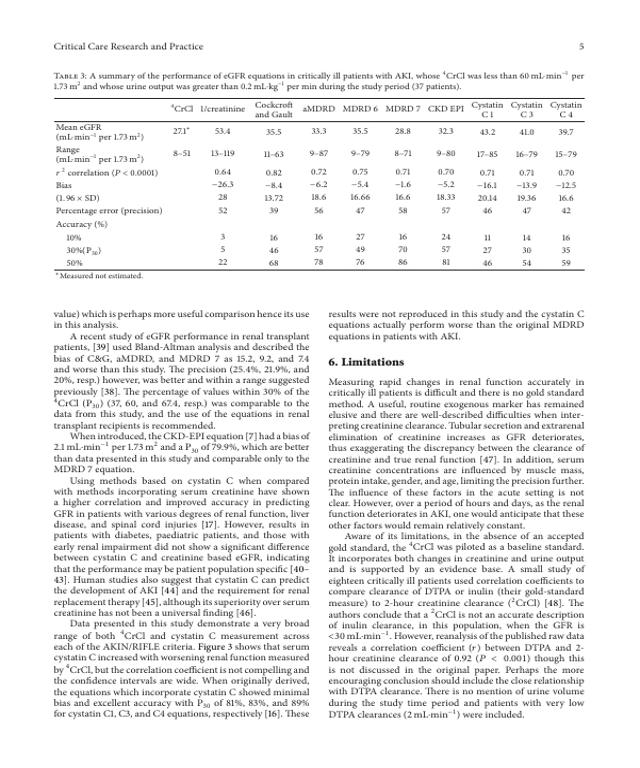

In [16]:
sample_img

In [17]:
sample_img_array = np.array(sample_img)

In [18]:
sample_img_array.shape

(768, 640, 3)

In [31]:
x = {}
x["image"] = transforms.ToTensor()(sample_img)
x["height"] = sample_img_array.shape[0]
x["width"] = sample_img_array.shape[1]

In [29]:
sample_batch = [x]

In [32]:
out = model_loaded(sample_batch)

AttributeError: to

In [ ]:
out[0]["instances"]

Instances(num_instances=3, image_height=768, image_width=640, fields=[pred_classes: tensor([4, 3, 4], device='cuda:0'), scores: tensor([0.3005, 0.1032, 0.0559], device='cuda:0', grad_fn=<IndexBackward>), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, 

In [ ]:
vis = Visualizer(sample_img)

In [ ]:
out_image = vis.draw_instance_predictions(out[0]["instances"]).get_image()

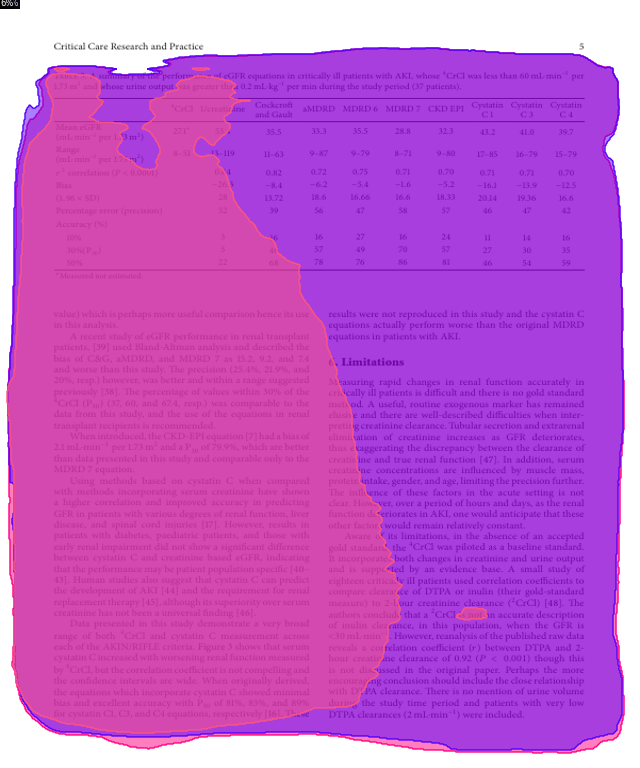

In [ ]:
Image.fromarray(out_image)

In [ ]:
import pickle

In [ ]:
from detectron2.utils.io import load_object

ModuleNotFoundError: No module named 'detectron2.utils.io'

In [ ]:
model_mrcnn = load_object("weights/model_final_maskrcnn.pkl")

NameError: name 'load_object' is not defined